In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('house_price.txt', names=['size', 'price'])
print(data)

X = data['size']
y = data['price']
m = len(data)

         size  price
0   27.575758   6.10
1   26.969697   3.80
2   36.969697   5.70
3   13.636364   1.80
4   56.969697  13.00
5   29.090909   6.20
6   80.303030  12.00
7   51.515152   9.00
8   34.848485   5.30
9   18.484848   1.70
10  30.909091   3.80
11  33.939394   5.80
12  26.060606   3.70
13  32.424242   8.50
14  32.121212   4.70
15  31.818182   4.70
16  30.909091   6.00
17  36.969697   5.00
18  32.424242   6.50
19  33.030303   6.50
20  27.575758   7.00
21  20.000000   2.70
22  25.454545   8.60
23  31.818182   6.20
24  32.424242   5.80
25  32.424242   8.19
26  28.484848   5.09
27  32.424242   8.00
28  37.272727   6.10
29  25.757576   5.90
30  23.333333   6.00
31  31.515152   7.20
32  33.333333   8.50
33  19.393939   3.90
34  33.030303   8.50
35  20.909091   2.50
36  33.636364   5.00
37  21.212121   2.35
38  30.606061   3.30
39  30.909091   4.50
40  29.393939   3.50
41  57.878788   6.30
42  30.909091   4.09
43  18.787879   2.20
44  28.181818   5.20
45  30.606061   3.30
46  21.212121

In [2]:
X = np.array(X).reshape(m, 1)
y = np.array(y).reshape(m, 1)
print(X.shape, y.shape)

(52, 1) (52, 1)


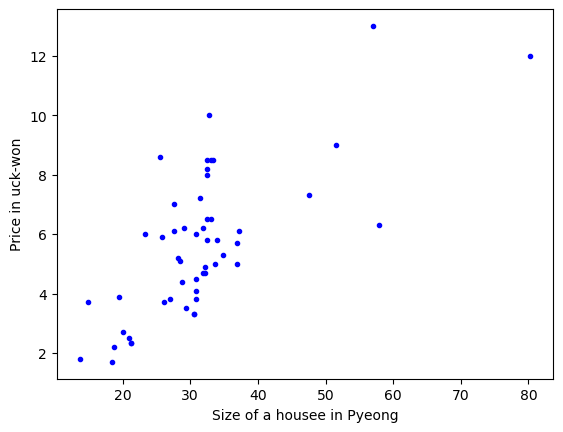

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.xlabel('Size of a housee in Pyeong')
plt.ylabel('Price in uck-won')
plt.show()

In [4]:
X_b = np.c_[np.ones((m, 1)), X]

learning_rate = 0.0001
n_iter = 200

theta = np.zeros((2,1))
gradients = np.zeros((2, 1))

for i in range(n_iter):
    gradients = (2 / m) * np.dot(X_b.T, np.dot(X_b, theta) - y)
    theta = theta - learning_rate * gradients

print('theta:')
print(theta)

theta:
[[0.007878  ]
 [0.17556765]]


In [5]:
X_new = np.array([[10], [90]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

print('10평과 90평 집의 예측 가격')
print(y_predict)

10평과 90평 집의 예측 가격
[[ 1.76355445]
 [15.80896606]]
